 1. Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os

2. Reading the data

In [21]:
df_bike = pd.read_csv("C:\\Users\\SANYAM\\Downloads\\day.csv")
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


3. Analyzing the Data

In [26]:
# shape
print(df_bike.shape)

#data types of data:
print(df_bike.dtypes)

(730, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


3. Meaningful Column Rename

In [29]:
df_bike.rename(columns={
    'instant':'rec_id',
    "dteday":"datetime",
    "yr":"year",
    "mnth":"month",
    "weathersit":"weather_condition",
    "hum":"humidity",
    "cnt":"total_count"
},inplace=True)

In [42]:
df_bike.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


4. Typecasting the datetime and numerical attributes to category

In [48]:
df_bike['datetime'] = pd.to_datetime(df_bike.datetime, dayfirst=True)
df_bike['season'] = df_bike.season.astype('category')
df_bike['year'] = df_bike.year.astype('category')
df_bike['month'] = df_bike.month.astype('category')
df_bike['holiday'] = df_bike.holiday.astype('category')
df_bike['weekday'] = df_bike.weekday.astype('category')
df_bike['workingday'] = df_bike.workingday.astype('category')
df_bike['weather_condition'] = df_bike.weather_condition.astype('category')

5. Describe the dataframe

In [51]:
df_bike.describe()

,rec_id,datetime,temp,atemp,humidity,windspeed,casual,registered,total_count
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


6. Checking the missing values

In [54]:
display(df_bike.isnull().sum())

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

No missing values in the dataset

Attribute Distribution Analysis:

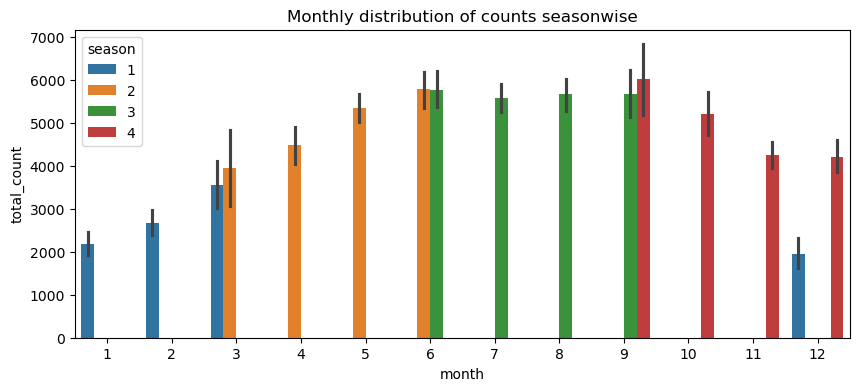

In [66]:
fig,ax = plt.subplots(figsize=(10,4))
#1. Monthly distribution of counts:
# Barplot for monthly distribution of counts seasonwise

sns.barplot(x='month',y = 'total_count',data=df_bike[['month','total_count','season']],ax=ax, hue='season')
ax.set_title('Monthly distribution of counts seasonwise')
plt.show()

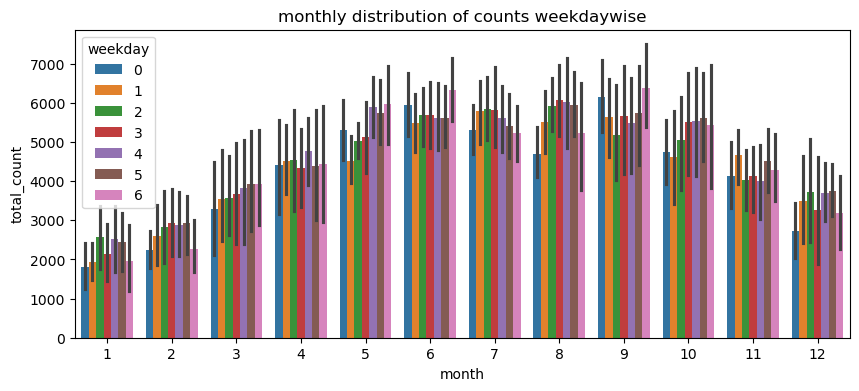

In [68]:
#2. Monthly distribution of counts, weekdaywise:
fig,ax1 = plt.subplots(figsize=(10,4))

# Barplot for monthly distribution of counts weekdaywise

sns.barplot(data=df_bike[['month','total_count','weekday']], x='month',y = 'total_count',ax=ax1, hue='weekday')
ax1.set_title('monthly distribution of counts weekdaywise')
plt.show()

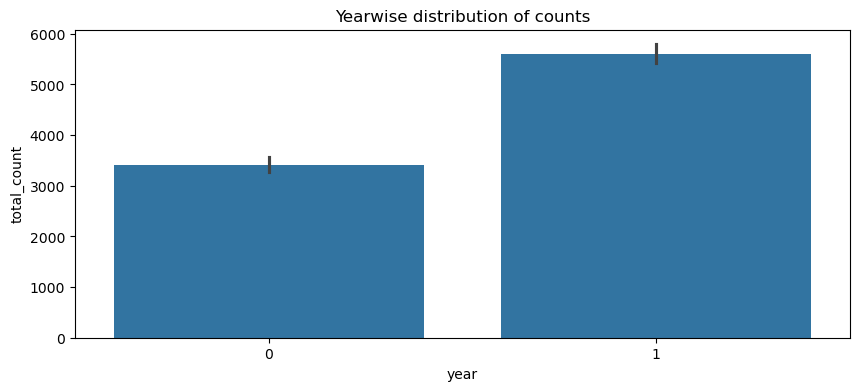

In [73]:
#3. Yearly distribution of counts:
fig,ax = plt.subplots(figsize=(10,4))

sns.barplot(data=df_bike[['year','total_count']], x='year',y = 'total_count')
ax.set_title('Yearwise distribution of counts')
plt.show()

From above graph, bike rental count distribution is higher in 2019 than in 2018.

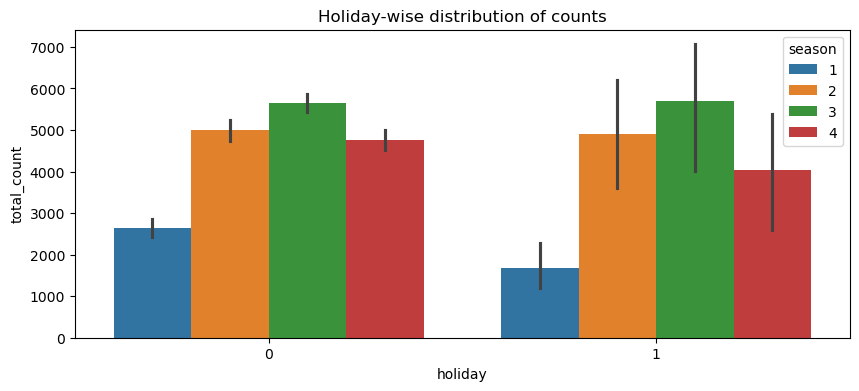

In [75]:
#4. Holidaywise distribution of counts:
fig,ax = plt.subplots(figsize=(10,4))

sns.barplot(hue='season', data = df_bike, x='holiday',y = 'total_count')
ax.set_title('Holiday-wise distribution of counts')
plt.show()

From above graph, rental counts are higher during no holidays (holiday -> 0) compare to holidays (holiday -> 1).

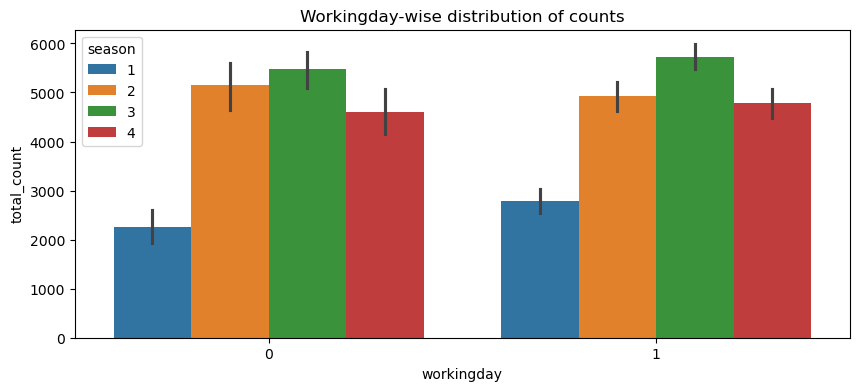

In [78]:
#5. Workingday-wise distribution of counts
fig,ax = plt.subplots(figsize=(10,4))

ax.set_title('Workingday-wise distribution of counts')
sns.barplot(data = df_bike, hue='season', x='workingday',y = 'total_count')
plt.show()

from above graph, there are no significant change in bike demand with working and non working days.

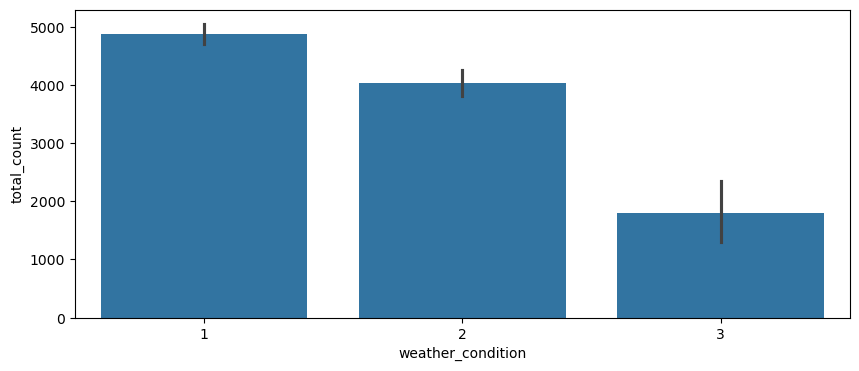

In [83]:
#6. Weather_condition_wise distribution of counts
fig,ax1 = plt.subplots(figsize=(10,4))

ax.set_title('Weather_condition_wise distribution of counts')
sns.barplot(ax=ax1, data = df_bike[['month','total_count','weather_condition']], x='weather_condition',y = 'total_count')

plt.show()

from above graph, weather_condition -> 1 - clear or partial cloud, bike rental count is highest.
                                    -> 2 - misty cloud, bike rental is second highest.
                                    -> 3 - light rain and snow, bike rental is minimum

7 a. Outlier Analysis: Total Count analysis

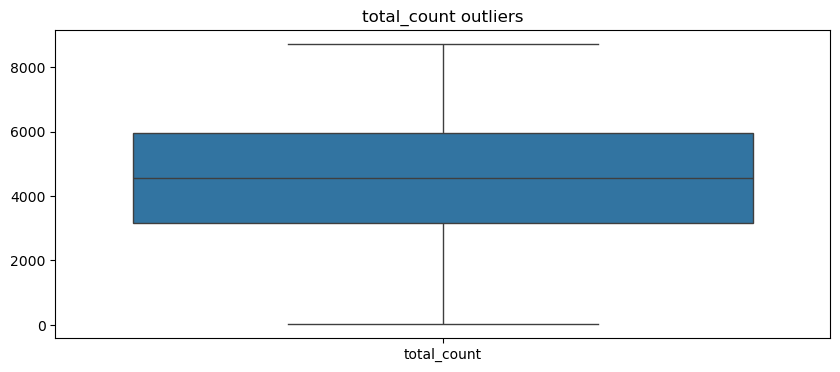

In [89]:
fig,ax=plt.subplots(figsize=(10,4))
ax.set_title('total_count outliers')
sns.boxplot(data=df_bike[['total_count']])

plt.show()

From above graph, no outliers are present in total_count variable

7 b. Outlier Analysis: Temp_windspeed_humidity_outliers

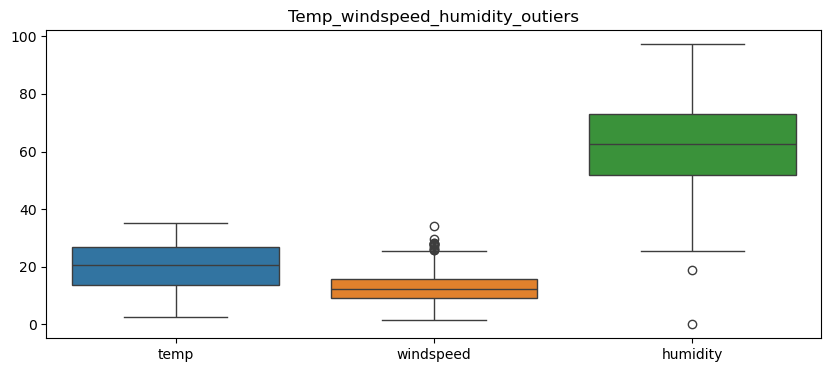

In [95]:
fig,ax=plt.subplots(figsize=(10,4))

ax.set_title('Temp_windspeed_humidity_outiers')
sns.boxplot(data=df_bike[['temp','windspeed','humidity']])

plt.show()

from above graphs,  temp -> no outlier 
                    windspeed -> few outliers are there
                    humidity variables -> few outliers are there

8. Imputing the Outliers:

In [99]:
df1=pd.DataFrame(df_bike,columns=['windspeed','humidity'])
 #cols for outliers                     
cols=['windspeed','humidity']       
                      
for i in cols:
    q75,q25=np.percentile(df1.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    max=q75+(iqr*1.5) #outer fence
    min=q25-(iqr*1.5) #inner fence
    df1.loc[df1.loc[:,i]<min,:i]=np.nan  #Replace with NA
    df1.loc[df1.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
df1['humidity']=df1['humidity'].fillna(df1['humidity'].mean())
df1['windspeed']=df1['windspeed'].fillna(df1['windspeed'].mean())

8. Replace the original dataset to imputated data

In [102]:
#Replacing the imputated humidity
df_bike['humidity']=df_bike['humidity'].replace(df1['humidity'])
#Replacing the imputated windspeed
df_bike['windspeed']=df_bike['windspeed'].replace(df1['windspeed'])
df_bike.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


9. Correlation matrix

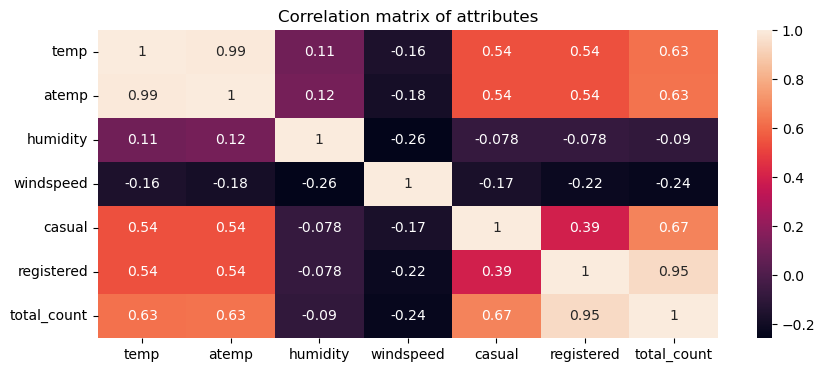

In [105]:
#Create the correlation matrix
corr=df_bike[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
#mask=np.array(corr)
#mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(10,4))
ax.set_title('Correlation matrix of attributes')
sns.heatmap(corr,annot=True,ax=ax)

plt.show()

From above graph, 
The temp and atemp are highly positively correlated to each other. 
The total_count,casual and registered are highly positively correlated to each other. 
So, we are going to ignore atemp,casual and registered variable for further analysis.

10. Modelling 

In [109]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [111]:
# Split the dataset into train and test in the ratio of 75:25

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_bike.iloc[:,0:-3],df_bike.iloc[:,-1],test_size=0.25, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
display(y_train.head())
display(y_test.head())

(547, 14)

(183, 14)

(547, 2)

(183, 2)

,index,total_count
0,653,7534
1,668,5566
2,694,5087
3,212,4266
4,18,1650


,index,total_count
0,468,7460
1,148,4788
2,302,3331
3,355,3068
4,515,7338


In [113]:
# Split the features into categorical and numerical features:

#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [115]:
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (547, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,10,2,55.8333,19.201653,12.208807,False,False,False,True,True,False,False,True,True,False,False,False,True
1,10,3,66.6667,14.657500,11.166689,False,False,False,True,True,False,False,True,False,True,False,False,True
2,11,1,53.5417,12.846653,3.125550,False,False,False,True,True,False,False,True,True,False,False,False,True
3,8,1,55.0833,31.638347,10.500039,False,False,True,False,True,False,False,True,True,False,False,True,False
4,1,3,74.1739,11.979134,13.957239,True,False,False,False,True,False,False,True,False,True,False,True,False


11. Training the dataset:

In [118]:
X_train=train_encoded_attributes
y_train=y_train.total_count.values

12. Fitting the model:

In [122]:
lr_model=linear_model.LinearRegression()
lr_model
lr_model.fit(X_train,y_train)
lr_model

LinearRegression()

In [124]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8234651143567974
Model coefficients : [  -32.39956593    61.40737347    -7.54372703   121.23091114
   -35.51878677 -1054.7667892    228.22792191    27.21650333
   799.32236396   280.64177223  -280.64177223   -83.14993437
    83.14993437   835.93938178   309.88119036 -1145.82057214
 -1011.87721534  1011.87721534]
Model intercept value : 2064.675656167312


In [126]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([6295.29755899, 5198.94970883, 5727.57833443, 5076.95218465,
       1174.15395678, 6901.54427748, 3785.39827021, 2298.69749077,
       5474.81203987, 3100.25444305, 1611.06559906, 6235.34443072,
       4259.40833633, 1430.21974647, 5056.73365773, 5222.40307371,
       4179.09608955, 6392.88884672, 5445.94378827, 6518.98675613,
       2431.58036965, 4906.4575506 , 3224.03016128, 6342.247955  ,
       4383.54445945, 3097.25243002, 5681.05900767, 3987.85991444,
       5159.97041591, 4734.97437306, 3223.77221569, 3319.51088905,
       6362.76112195, 6792.472647  , 3949.98345719, 2717.95445134,
       5139.00876102, 4191.50082848, 4435.39262676, 1089.87274526,
       6770.64407857, 5171.168065  , 5627.15847878, 4098.84719112,
       3448.7393557 , 5442.95477356, 2938.75095081, 4350.41629041,
       5895.97112043, 4251.20927858, 6360.4932426 , 7339.25541941,
       3356.69952235,  801.62086444,  679.3174427 , 6638.35993714,
       7150.65890085, 4110.93615541, 5698.65143492, 6143.44655

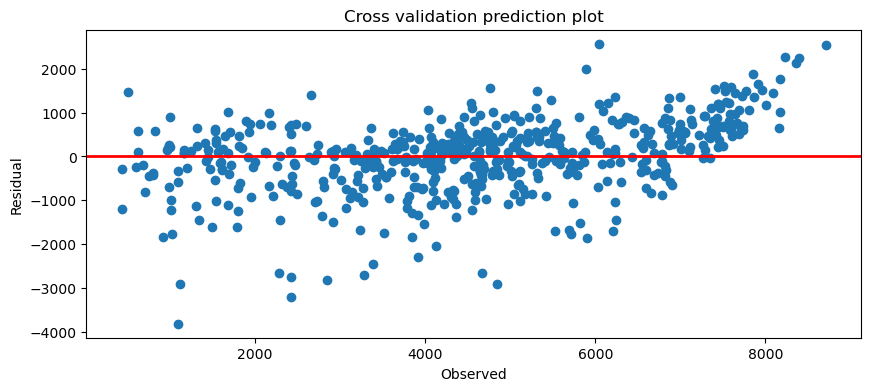

In [130]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(10,4))
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='red')

plt.show()

In [132]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8120373844870931


predictor is only able to predict 81% of the variance in the target variable

Testing the Model:

In [138]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (183, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,4,6,50.2917,20.295000,12.791439,False,True,False,False,True,False,True,False,True,False,False,False,True
1,5,0,81.8750,27.367500,14.333846,False,True,False,False,True,False,True,False,True,False,False,True,False
2,10,0,62.3750,13.085847,11.833339,False,False,False,True,True,False,True,False,True,False,False,True,False
3,12,4,75.7500,17.356653,3.167425,True,False,False,False,True,False,False,True,False,True,False,True,False
4,5,4,49.2917,27.880000,13.083693,False,True,False,False,True,False,False,True,True,False,False,False,True


In [140]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values

In [142]:
#predict the model
lr_pred=lr_model.predict(X_test)
display(lr_pred)

array([6203.71608086, 4343.48324333, 3257.11970196, 1948.76169343,
       7131.50131724, 4614.58070316, 2077.71026122, 2575.43155086,
       3566.57197033, 3693.90669376, 2961.45786034, 5029.83503465,
       1735.23464192, 3953.89666104, 5194.01756807, 3025.95309645,
       5796.26765293, 1316.59004245, 6118.1759834 , 4277.0314525 ,
       3557.98740376, 4107.32448259, 4518.51935543, 5765.65074325,
       5234.70847035, 5205.53792298, 3699.67657718,  638.4199942 ,
       4932.41542312, 1865.16161409, 3451.96439411, 3114.77935306,
       1199.85075332, 1234.71248623, 5454.34777205, 5224.76844475,
       3258.4144739 , 3233.82248668,  794.16206853, 6731.42877668,
       1801.31673049, 5822.16938381, 5030.96124545, 6267.03189796,
       4731.03763053, 3400.40040871, 6239.97890171, 5025.73830527,
       4492.81986857, 6748.20359357, 3866.52380135, 4453.77543854,
       5843.97109175, 5462.14167273, 5494.40256585, 6965.45633722,
       3708.63781288, 6279.75431885, 4228.54587816, 5306.61525

Model Evaluation Metrics - Root Mean Square Error & Mean Absolute Error scores

In [145]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 792.5646612856608
Mean absolute error : 580.6367705425238


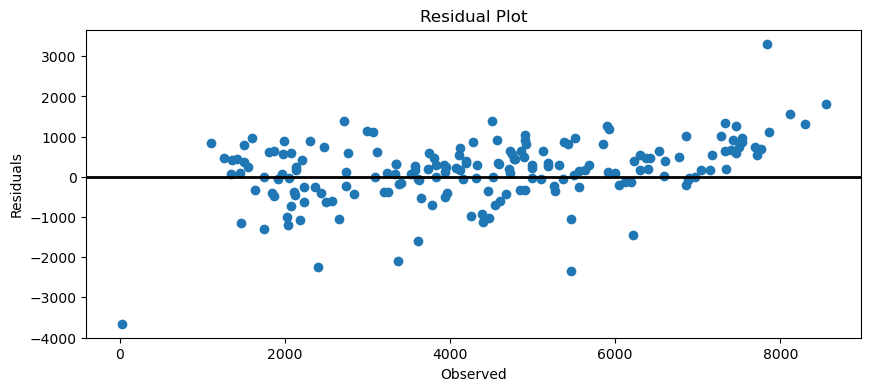

In [147]:
#Residual plot
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')

plt.show()

In above graph, very less data points are having the same finite variance between them.